# <span style="color:lightblue"><center><b>CLASSIFICAÇÃO DOS ESTÁGIOS</b></center></span>

### **Importação das Bibliotecas**

In [301]:
import pandas as pd # Manipulação de Tabelas
import numpy as np # Operações matemáticas
import matplotlib.pyplot as plt # Visualização de Dados
from matplotlib.colors import LinearSegmentedColormap # Manipulação de paletas de cores
from seaborn import heatmap # Mapa de Calor
from funcions import plot_boxplots # Função criada na EDA_numericos

In [302]:
# Leitura dos dados
df = pd.read_csv(r'..\data\dados_processados\liver_cirrhosis_v2.csv')

In [303]:
# Separando as colunas categóricas
categoric_columns = df.select_dtypes(include=['object']).columns

In [304]:
df[categoric_columns].head()

,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema
0,F,N,S,N,N
1,M,S,N,S,N
2,F,N,N,N,N
3,F,N,N,N,N
4,F,N,S,N,N


In [309]:
binary_columns = [pd.factorize(column) for column in df[categoric_columns].columns]

C:\Users\user\AppData\Local\Temp\ipykernel_5688\1481524413.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  binary_columns = [pd.factorize(column) for column in df[categoric_columns].columns]


In [310]:
binary_columns

[(array([0, 0, 0, 0], dtype=int64), array(['Sexo'], dtype=object)),
 (array([0, 0, 0, 0, 0, 0], dtype=int64), array(['Ascite'], dtype=object)),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  array(['Hepatomegalia'], dtype=object)),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  array(['Telangiectasia'], dtype=object)),
 (array([0, 0, 0, 0, 0], dtype=int64), array(['Edema'], dtype=object))]

In [305]:
df[categoric_columns] = pd.factorize(df[categoric_columns])

C:\Users\user\AppData\Local\Temp\ipykernel_5688\1809112281.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df[categoric_columns] = pd.factorize(df[categoric_columns])


ValueError: could not broadcast input array from shape (9637,5) into shape (9637,)

In [265]:
# Convertendo idade em dias para anso
df['Idade'] = (df['Idade']/365).astype(int)
df['Idade']

0       50
1       54
2       32
3       45
4       59
        ..
9632    49
9633    64
9634    67
9635    58
9636    78
Name: Idade, Length: 9637, dtype: int32

In [266]:
df.head()

,Sexo_F,Sexo_M,Ascite_N,Ascite_S,Hepatomegalia_N,Hepatomegalia_S,Telangiectasia_N,Telangiectasia_S,Edema_N,Edema_S,...,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,True,False,True,False,False,True,True,False,True,False,...,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,False,True,False,True,True,False,False,True,True,False,...,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,True,False,True,False,True,False,True,False,True,False,...,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,True,False,True,False,True,False,True,False,True,False,...,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,True,False,True,False,False,True,True,False,True,False,...,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [267]:
# Separando as colunas categóricas
numeric_columns = df.select_dtypes('number')

<Axes: >

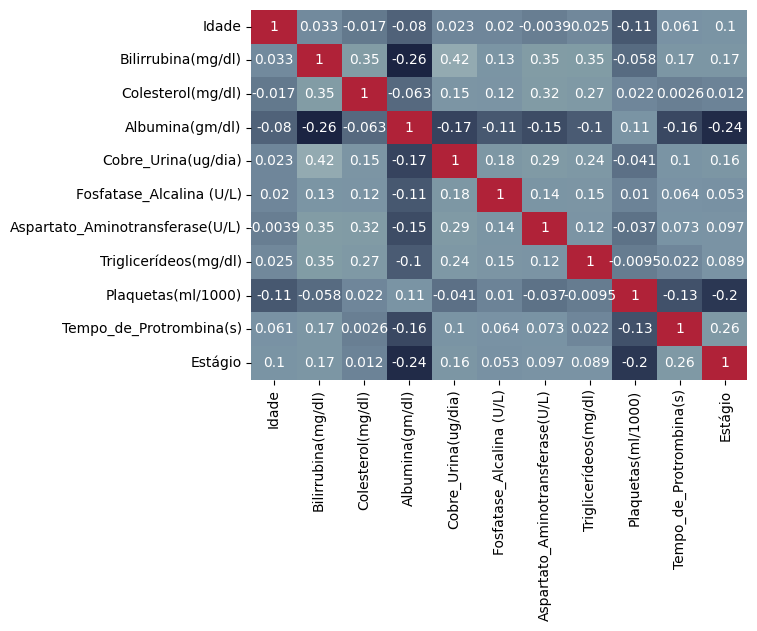

In [268]:
# Mapa de calor com as correlações
colors = ["#1b2442","#7992a4","#829da5","#f4f7f7","#b02238"]
cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)
heatmap(numeric_columns.corr(), 
    annot=True, # Escreve os valores dos coeficientes
    cmap=cmap, # Paleta de cores
    cbar=False
)

In [269]:
# Filtando os índices de correlção que possui o módulo > 0.10
mask = numeric_columns.corr().abs() > 0.1
filtered = numeric_columns.corr().where(mask)
filtered

,Idade,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
Idade,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.112695,NaN,NaN
Bilirrubina(mg/dl),NaN,1.000000,0.352127,-0.261299,0.415027,0.132425,0.352460,0.348504,NaN,0.170697,0.172219
Colesterol(mg/dl),NaN,0.352127,1.000000,NaN,0.145983,0.117626,0.322665,0.267340,NaN,NaN,NaN
Albumina(gm/dl),NaN,-0.261299,NaN,1.000000,-0.168683,-0.112587,-0.147348,-0.103031,0.107514,-0.156307,-0.237199
Cobre_Urina(ug/dia),NaN,0.415027,0.145983,-0.168683,1.000000,0.184010,0.285076,0.239766,NaN,0.101950,0.160070
Fosfatase_Alcalina (U/L),NaN,0.132425,0.117626,-0.112587,0.184010,1.000000,0.137345,0.153644,NaN,NaN,NaN
Aspartato_Aminotransferase(U/L),NaN,0.352460,0.322665,-0.147348,0.285076,0.137345,1.000000,0.119134,NaN,NaN,NaN
Triglicerídeos(mg/dl),NaN,0.348504,0.267340,-0.103031,0.239766,0.153644,0.119134,1.000000,NaN,NaN,NaN
Plaquetas(ml/1000),-0.112695,NaN,NaN,0.107514,NaN,NaN,NaN,NaN,1.000000,-0.129620,-0.204035
Tempo_de_Protrombina(s),NaN,0.170697,NaN,-0.156307,0.101950,NaN,NaN,NaN,-0.129620,1.000000,0.262452


In [270]:
# Função para plotar gráficos de dispersão

def plot_scatter(df, categorias:list, colors:dict, x, y):
    
    for categoria in categorias:
        data = df[df['Estágio'] == categoria]
        plt.scatter(data[x.name], data[y.name], label=categoria, color=colors[categoria])
        
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title('Gráfico de Dispersão')
    plt.legend(title='Estágio')
    plt.show()


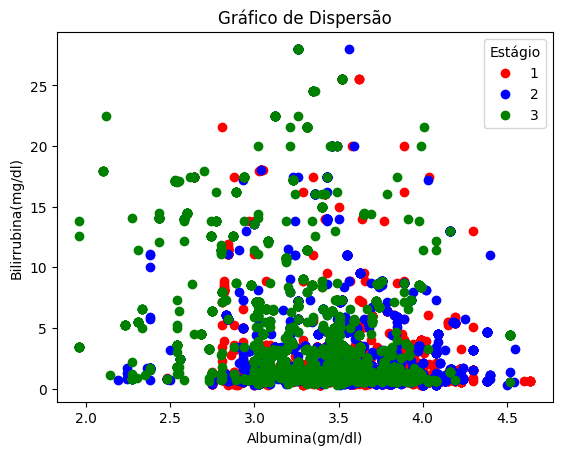

In [271]:
# Gráfico de dispersão colorido por estágio
estagios = df['Estágio'].unique()
colors = {
    1:'red',
    2:'blue',
    3:'green' 
}

# Plotar
plot_scatter(df=df, categorias=estagios, colors=colors, x=df['Albumina(gm/dl)'], y=df['Bilirrubina(mg/dl)'])


<Axes: >

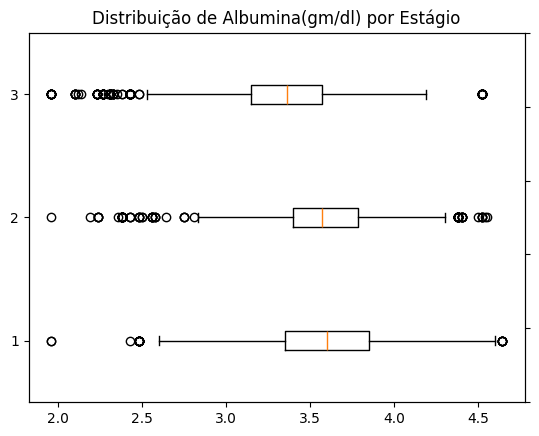

In [272]:
# Boxplots da Albumina por estágio
plot_boxplots(df=df, serie_categoria=df['Estágio'], serie_alvo=df['Albumina(gm/dl)'])

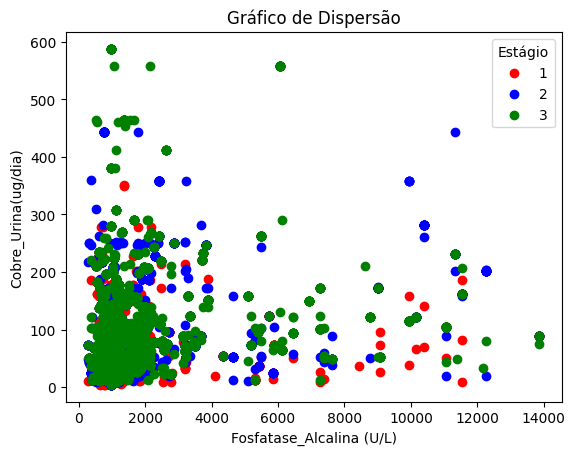

In [273]:
# Gráfico de Dispersão da Fosfatase e Cobre por Estágio
plot_scatter(df=df, categorias=estagios, colors=colors, x=df['Fosfatase_Alcalina (U/L)'], y= df['Cobre_Urina(ug/dia)'])

### Plotando um gráfico de dispersão 3d com base nas 3 variáveis definidas como importantes na EDA

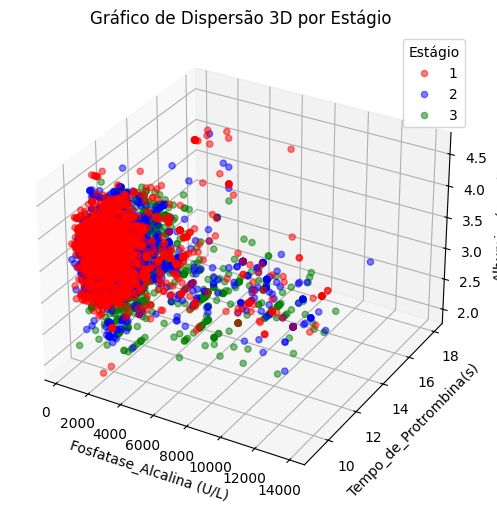

In [274]:
categories = df['Estágio'].unique()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for category in categories:
    subset = df[df['Estágio'] == category]
    ax.scatter(
        subset['Fosfatase_Alcalina (U/L)'], 
        subset['Tempo_de_Protrombina(s)'], 
        subset['Albumina(gm/dl)'], 
        label=category, 
        color=colors[category], 
        alpha=0.5
        )

ax.set_xlabel('Fosfatase_Alcalina (U/L)')
ax.set_ylabel('Tempo_de_Protrombina(s)')
ax.set_zlabel('Albumina(gm/dl)')
ax.set_title('Gráfico de Dispersão 3D por Estágio')
ax.legend(title='Estágio')
plt.show()


É possível perceber que conforme o estágio avança, os pontos se espalham mais. Essa característica permite definir que essas variáveis serão utilizadas no modelo.

#### **Separação de Dados de Treino e Teste**

In [275]:
from sklearn.model_selection import train_test_split # Separação de dados de treino e teste
from sklearn.linear_model import LogisticRegression # Modelo de Regressão Logística
from sklearn.metrics import classification_report # Feedback do modelo
from sklearn.preprocessing import StandardScaler # Padronizador de Dados

In [276]:
X = df.drop(columns=['Estágio']).values # Dados preditores
Y = df['Estágio'].values # Alvo

In [277]:
# Separação de Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)

In [278]:
# Instanciando o padronizador
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Padronizando os dados de treino
X_test_scaled = scaler.transform(X_test) # Padronizando os dados de teste

In [279]:
# Salvando o Scaler
import joblib
 
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [280]:
# Instanciando o classificador
classifier = LogisticRegression(max_iter=3000, n_jobs=-1)

In [281]:
# Fazendo o fit dos dados de treino
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [282]:
# Classe da predição
test_predict = classifier.predict(X_test_scaled)

In [283]:
# Feedback do modelo
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           1       0.47      0.57      0.51      2264
           2       0.46      0.34      0.39      2484
           3       0.63      0.68      0.66      2480

    accuracy                           0.53      7228
   macro avg       0.52      0.53      0.52      7228
weighted avg       0.52      0.53      0.52      7228



In [284]:
# Importância das classes para o modelo
coefficients = classifier.coef_
feature_importance = pd.DataFrame(coefficients.T, index=df.drop('Estágio', axis=1).columns, columns=classifier.classes_)
print("Importância das Variáveis (Coeficientes):\n")
print(feature_importance)

Importância das Variáveis (Coeficientes):

                                        1         2         3
Sexo_F                           0.000835  0.002350 -0.003186
Sexo_M                          -0.000835 -0.002350  0.003186
Ascite_N                         0.043744  0.062639 -0.106383
Ascite_S                        -0.043744 -0.062639  0.106383
Hepatomegalia_N                  0.268784  0.009360 -0.278144
Hepatomegalia_S                 -0.268784 -0.009360  0.278144
Telangiectasia_N                 0.067769 -0.016997 -0.050772
Telangiectasia_S                -0.067769  0.016997  0.050772
Edema_N                          0.092379 -0.029668 -0.062711
Edema_S                         -0.092379  0.029668  0.062711
Idade                            0.014245 -0.099154  0.084909
Bilirrubina(mg/dl)               0.101920 -0.090168 -0.011752
Colesterol(mg/dl)                0.061288  0.168470 -0.229758
Albumina(gm/dl)                  0.047378  0.182276 -0.229655
Cobre_Urina(ug/dia)        